In [1]:
import matplotlib.pyplot as plt
import numpy as np
import IPython.display    

#import matplotlib
#matplotlib.rcParams['text.usetex'] = True

In [2]:
m = 0.001
k = 0.1
p_0 = 0.001
x_0 = 0
dt1 = 0.001
dt2 = 0.1
t_tot = 10
N1 = int(t_tot/dt1)+1
N2 = int(t_tot/dt2)+1
omega = np.sqrt(k/m)
print(omega)

# units kg, m, s only
time1 = np.linspace(0,t_tot, N1)
time2 = np.linspace(0,t_tot, N2)

10.0


In [3]:
def solution(t,x_0, p_0, omega):
    return(x_0*np.cos(omega*t)+p_0/(m*omega)*np.sin(omega*t))
def solution_p(t,x_0, p_0, omega):
    return(p_0*np.cos(omega*t)-x_0*omega*np.sin(omega*t))

In [4]:
def force(x):
    return(-k*x)
def energies(x, p):
    T = p**2/(2*m)
    U = 1/2*k*x**2
    return(T+U, T, U)
def accel(x):
    return(-k/m*x)

In [5]:
start = np.array([x_0, p_0, force(x_0),energies(x_0, p_0)[0],energies(x_0, p_0)[1],energies(x_0, p_0)[2]])
print(start)

[ 0.      0.001  -0.      0.0005  0.0005  0.    ]


In [6]:
def heun(start, dt):
    
    N = int(t_tot/dt)+1
    Y = np.zeros((N,6))
    Y[0,:] = start
    
    for i in range(1,N):
        xn = Y[i-1,0]
        pn = Y[i-1, 1]
        fn = Y[i-1, 2]
        Y[i, 0] = xn + 1/m*(pn + fn*dt/2)*dt
        
        force_intermediate = force(xn + pn/m*dt/2)
        
        Y[i, 1] = pn + force_intermediate*dt
        Y[i, 2] = force(Y[i, 0])
        Y[i ,3:6] = energies(Y[i, 0],Y[i, 1])
    
    return(Y)

In [7]:
def backwards_heun(start, dt):
    
    N = int(t_tot/dt)+1
    Y = np.zeros((N,6))
    Y[0,:] = start
    
    for i in range(1,N):
        xn = Y[i-1,0]
        pn = Y[i-1, 1]
        fn = Y[i-1, 2]
        
        Y[i, 1] = pn - fn*dt
        
        Y[i, 0] = xn - 1/m*(pn + fn*dt/2)*dt
        
        force_intermediate = force(xn + pn/m*dt/2)
        
        Y[i, 2] = force(Y[i, 0])
        Y[i ,3:6] = energies(Y[i, 0],Y[i, 1])
    
    return(Y)



In [8]:
heun1 = heun(start, dt1)


#printing the last step
end_heun = heun1[-1,:]
end_heun[1]= end_heun[1] *-1
#print(end_heun)

first_backward_heun = np.flip(heun(end_heun, dt1),0)

#print(heun1-first_backward_heun)

In [9]:
heun2 = heun(start, dt2)

end_heun2 = heun2[-1,:]
end_heun2[1]= end_heun2[1] *-1
#print(end_heun2)

first_backward_heun_2 = np.flip(heun(end_heun2, dt2),0)

#print(heun2-first_backward_heun_2)

In [10]:
def verlet(start, dt):
    
    N = int(t_tot/dt)+1
    Y = np.zeros((N,6))
    Y[0,:] = start
    
    for i in range(1,N):
        xn = Y[i-1,0]
        pn = Y[i-1, 1]
        fn = Y[i-1, 2]
        
        p_intermediate = pn+ fn/2*dt
        
        Y[i, 0] = xn + p_intermediate/m*dt
        
        f_intermediate = force(Y[i,0])
        Y[i ,2] = f_intermediate
        
        Y[i, 1] = p_intermediate + f_intermediate*dt/2
        
        Y[i ,3:6] = energies(Y[i, 0],Y[i, 1])
        #Y[i ,6] = accel(Y[i, 0])
    
    
    return(Y)

In [11]:
def backward_verlet(start, dt):
    
    N = int(t_tot/dt)+1
    Y = np.zeros((N,6))
    Y[0,:] = start
    
    for i in range(1,N):
        xn = Y[i-1,0]
        pn = Y[i-1, 1]
        fn = Y[i-1, 2]
        
        p_intermediate = pn- fn/2*dt
        
        Y[i, 0] = xn - p_intermediate/m*dt
        
        f_intermediate = force(Y[i,0])
        Y[i ,2] = f_intermediate
        
        Y[i, 1] = p_intermediate - f_intermediate*dt/2
        
        Y[i ,3:6] = energies(Y[i, 0],Y[i, 1])
        #Y[i ,6] = accel(Y[i, 0])
    
    
    return(Y)

In [12]:
verlet1 = verlet(start, dt1)


#checking the energies
#print(verlet1[:,4]+verlet1[:,5])
#print(verlet1[:,3])

#printing the last step
end_verlet = verlet1[-1,:]
print(end_verlet)

backward_verlet = np.flip(backward_verlet(end_verlet, dt1),0)



[-0.05060126  0.00086253  0.00506013  0.0005      0.00037198  0.00012802]


In [13]:
verlet2 = verlet(start, dt2)


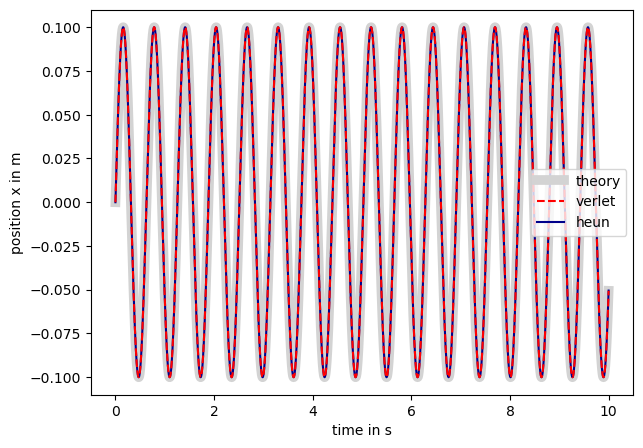

In [14]:
t1_position = plt.figure(figsize = (7,5))

plt.plot(time1, solution(time1,x_0, p_0, omega), linewidth = 7, color = 'lightgrey', label = 'theory')
plt.plot(time1, verlet1[:,0], label = 'verlet', linestyle = 'dashed', color = 'red', zorder = 3)
plt.plot(time1, heun1[:,0], label = 'heun', color = 'darkblue')

#plt.plot(time1, first_backward_heun[:,0],label = 'backward_heun', color = 'lightgrey', linewidth = 4, zorder = 0)


#plt.plot(time1, (heun1[:,0]-first_backward_heun[:,0])*10000,label = 'backward_heun', color = 'blue', linewidth = 1, zorder = 0)

#print(np.shape(solution(time1,x_0, p_0, omega)), np.shape(heun1[:,0]))
plt.legend()
plt.xlabel('time in s')
plt.ylabel('position x in m')

t1_position.savefig("t1_position.pdf", bbox_inches='tight')

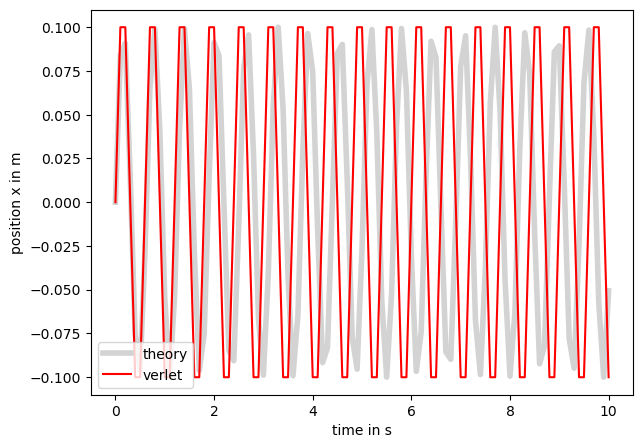

In [15]:
t2_position = plt.figure(figsize = (7,5))

plt.plot(time2, solution(time2,x_0, p_0, omega), linewidth = 4, color = 'lightgrey', label = 'theory')
plt.plot(time2, verlet2[:,0], label = 'verlet', color = 'red')

#plt.plot(time2, (solution(time2,x_0, p_0, omega)-verlet2[:,0]), label = 'diff.', color = 'green')
#plt.plot(time2, heun2[:,0], linestyle = (0, (1, 10)),label = 'heun', color = 'darkblue')
#print(np.shape(solution(time1,x_0, p_0, omega)), np.shape(heun1[:,0]))
plt.legend()
plt.xlabel('time in s')
plt.ylabel('position x in m')

t2_position.savefig("t2_position.pdf", bbox_inches='tight')

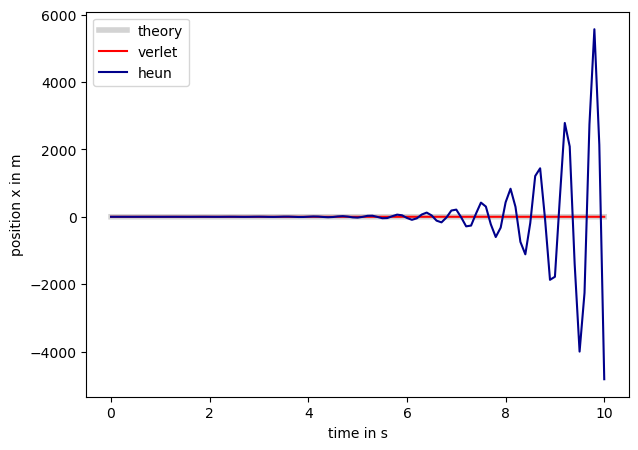

In [16]:
t2_position_heun = plt.figure(figsize = (7,5))

plt.plot(time2, solution(time2,x_0, p_0, omega), linewidth = 4, color = 'lightgrey', label = 'theory')
plt.plot(time2, verlet2[:,0], label = 'verlet', color = 'red')
plt.plot(time2, heun2[:,0], label = 'heun', color = 'darkblue')
#plt.plot(time2, (solution(time2,x_0, p_0, omega)-verlet2[:,0]), label = 'diff.', color = 'green')
#plt.plot(time2, heun2[:,0], linestyle = (0, (1, 10)),label = 'heun', color = 'darkblue')
#print(np.shape(solution(time1,x_0, p_0, omega)), np.shape(heun1[:,0]))
plt.legend()
plt.xlabel('time in s')
plt.ylabel('position x in m')

t2_position_heun.savefig("t2_position_heun.pdf", bbox_inches='tight')

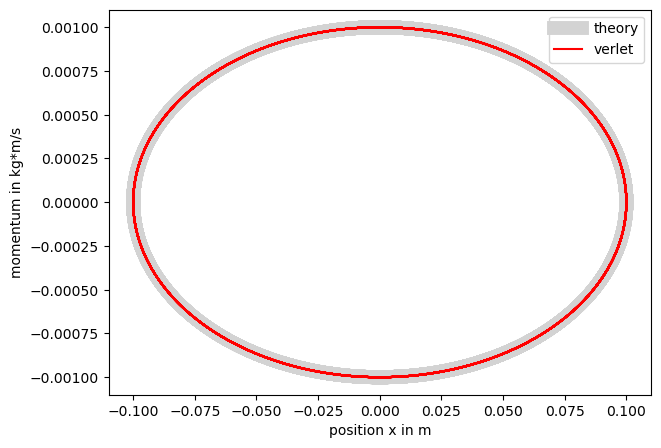

In [17]:
t1_phasespace = plt.figure(figsize = (7,5))

plt.plot(solution(time1,x_0, p_0, omega),solution_p(time1,x_0, p_0, omega), linewidth = 10, color = 'lightgrey', label = 'theory')
plt.plot(verlet1[:,0],verlet1[:,1], label = 'verlet', color = 'red')
#plt.plot(heun1[:,0],heun1[:,1],label = 'heun', color = 'darkblue', linewidth = 1)
#print(np.shape(solution(time1,x_0, p_0, omega)), np.shape(heun1[:,0]))
plt.legend()
plt.ylabel('momentum in kg*m/s')
plt.xlabel('position x in m')

t1_phasespace.savefig("t1_phasespace.pdf", bbox_inches='tight')

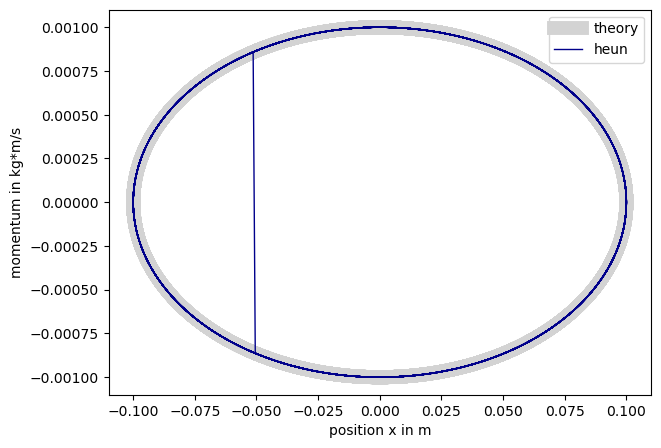

In [18]:
t1_phasespace_heun = plt.figure(figsize = (7,5))

plt.plot(solution(time1,x_0, p_0, omega),solution_p(time1,x_0, p_0, omega), linewidth = 10, color = 'lightgrey', label = 'theory')
plt.plot(heun1[:,0],heun1[:,1],label = 'heun', color = 'darkblue', linewidth = 1)
#print(np.shape(solution(time1,x_0, p_0, omega)), np.shape(heun1[:,0]))
plt.legend()
plt.ylabel('momentum in kg*m/s')
plt.xlabel('position x in m')

t1_phasespace_heun.savefig("t1_phasespace_heun.pdf", bbox_inches='tight')

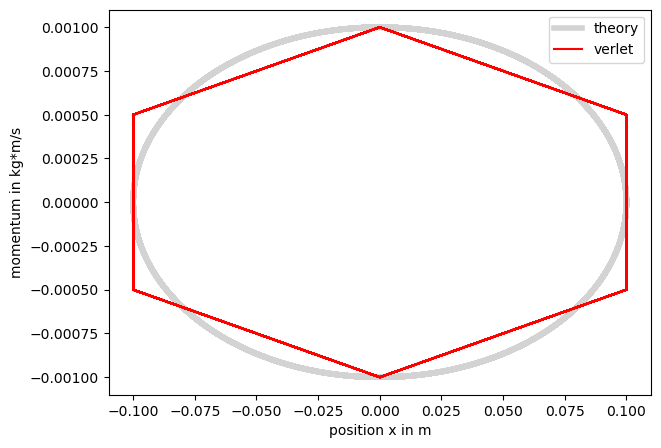

In [19]:
t2_phasespace = plt.figure(figsize = (7,5))

plt.plot(solution(time1,x_0, p_0, omega),solution_p(time1,x_0, p_0, omega), linewidth = 4, color = 'lightgrey', label = 'theory')
plt.plot(verlet2[:,0],verlet2[:,1], label = 'verlet', color = 'red')
#plt.plot(heun2[:,0],heun2[:,1],label = 'heun', color = 'darkblue', linewidth = 1)
#print(np.shape(solution(time1,x_0, p_0, omega)), np.shape(heun1[:,0]))
plt.legend()
plt.ylabel('momentum in kg*m/s')
plt.xlabel('position x in m')

t2_phasespace.savefig("t2_phasespace.pdf", bbox_inches='tight')

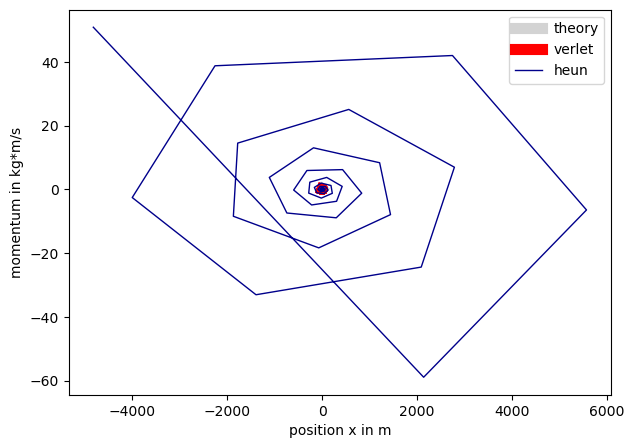

In [20]:
t2_phasespace_heun = plt.figure(figsize = (7,5))

plt.plot(solution(time1,x_0, p_0, omega),solution_p(time1,x_0, p_0, omega), linewidth = 8, color = 'lightgrey', label = 'theory')
plt.plot(verlet2[:,0],verlet2[:,1], label = 'verlet', color = 'red', linewidth = 8)
plt.plot(heun2[:,0],heun2[:,1],label = 'heun', color = 'darkblue', linewidth = 1)
#print(np.shape(solution(time1,x_0, p_0, omega)), np.shape(heun1[:,0]))
plt.legend()
plt.ylabel('momentum in kg*m/s')
plt.xlabel('position x in m')

t2_phasespace_heun.savefig("t2_phasespace_heun.pdf", bbox_inches='tight')

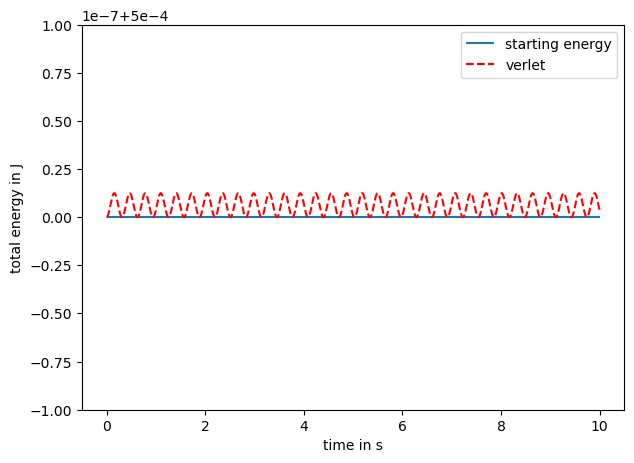

In [21]:
t1_energy = plt.figure(figsize = (7,5))

plt.hlines(start[3], 0, 10, label = 'starting energy')
plt.plot(time1, verlet1[:,3], label = 'verlet', linestyle = 'dashed', color = 'red', zorder = 4)
#plt.plot(time1, heun1[:,3],label = 'heun', color = 'darkblue')
#print(np.shape(solution(time1,x_0, p_0, omega)), np.shape(heun1[:,0]))
plt.ylim(0.0004999,0.0005001)
plt.legend()
plt.xlabel('time in s')
plt.ylabel('total energy in J')

t1_energy.savefig("t1_energy.pdf", bbox_inches='tight')

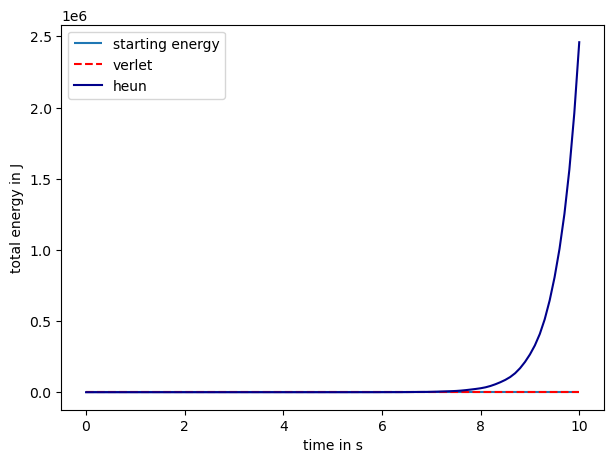

In [22]:
t2_energy = plt.figure(figsize = (7,5))



plt.hlines(start[3], 0, 10, label = 'starting energy')
plt.plot(time2, verlet2[:,3]-verlet2[:,0], label = 'verlet', linestyle = 'dashed', color = 'red')
plt.plot(time2, heun2[:,3]-heun2[:,0],label = 'heun', color = 'darkblue')
#print(np.shape(solution(time1,x_0, p_0, omega)), np.shape(heun1[:,0]))
plt.legend()
plt.xlabel('time in s')
plt.ylabel('total energy in J')

t2_energy.savefig("t2_energy.pdf", bbox_inches='tight')

In [23]:
t2_energy = plt.figure(figsize = (7,5))

plt.plot(, heun1[:,3]-heun1[:,0],label = 'heun', color = 'darkblue')
plt.plot(, heun2[:,3]-heun2[:,0],label = 'heun', color = 'darkblue')
#print(np.shape(solution(time1,x_0, p_0, omega)), np.shape(heun1[:,0]))
plt.legend()
plt.xlabel('time in s')
plt.ylabel('total energy in J')

#t2_energy.savefig("t2_energy.pdf", bbox_inches='tight')

SyntaxError: invalid syntax (1978685799.py, line 3)

In [ ]:
t1_backward = plt.figure(figsize = (7,5))

plt.plot(time1, verlet1[:,0], label = 'verlet', linestyle = 'dashed', color = 'red', zorder = 10)
plt.plot(time1, backward_verlet1[:,0], label = 'backward_verlet', color = 'lightgrey', linewidth = 4)

plt.plot(time1, (verlet1[:,0]- backward_verlet[:,0]),label = 'difference', color = 'blue', linewidth = 1, zorder = 0)


#plt.plot(time1, heun1[:,0], linestyle = (0, (1, 10)),label = 'heun', color = 'darkblue')
#print(np.shape(solution(time1,x_0, p_0, omega)), np.shape(heun1[:,0]))
plt.legend()
plt.xlabel('time in s')
plt.ylabel('position x in m')

#t1_backward.savefig("t1_backward.pdf", bbox_inches='tight')

In [ ]:
t1_position = plt.figure(figsize = (7,5))

plt.plot(time1, heun1[:,0], linestyle = (0, (1, 10)),label = 'heun', color = 'darkblue')

plt.plot(time1, first_backward_heun[:,0],label = 'backward_heun', color = 'lightgrey', linewidth = 4, zorder = 0)


plt.plot(time1, (heun1[:,0]-first_backward_heun[:,0])*10000,label = 'difference', color = 'blue', linewidth = 1, zorder = 0)

#print(np.shape(solution(time1,x_0, p_0, omega)), np.shape(heun1[:,0]))
plt.legend()
plt.xlabel('time in s')
plt.ylabel('position x in m')

#t1_position.savefig("t1_position.pdf", bbox_inches='tight')